In [1]:
#Imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import sys
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
import tensorflow as tf

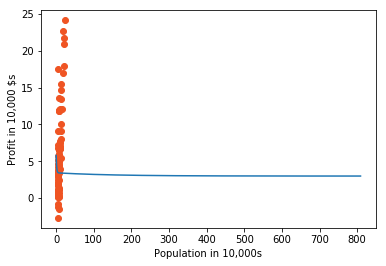

1. LR with One Variable using Gradient Descent - Root mean square error is 2.993687135285656


In [2]:
# Q.1 Linear Regression Gradient Decent One variable without matrix

# Reading and plotting data
data = pd.read_csv('ex1data1.csv', header=None)
#print(data.shape)
X = data[0]
Y = data[1]

plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
plt.ylabel('Profit in 10,000 $s');
plt.xlabel('Population in 10,000s');

def get_rmse(x, y, weight, bias):
    m = len(x)
    total_error = 0.0
    for i in range(m):
        total_error += (y[i] - (weight*x[i] + bias))**2
    return math.sqrt(total_error / m)

def update_weights(x, y, weight, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    m = len(x)

    for i in range(m):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2*x[i] * (y[i] - (weight*x[i] + bias))

        # -2(y - (mx + b))
        bias_deriv += -2*(y[i] - (weight*x[i] + bias))

    # We subtract because the derivatives point in direction of steepest ascent
    weight -= (weight_deriv / m) * learning_rate
    bias -= (bias_deriv / m) * learning_rate

    return weight, bias

def fit(x, y, weight, bias, learning_rate, iters):
    cost_history = []
    weights = []
    biases = []
    old_cost = sys.maxsize
    new_cost = sys.maxsize
    while(True):
        weight,bias = update_weights(x, y, weight, bias, learning_rate)
        weights.append(weight)
        biases.append(bias)
        #Calculate cost for auditing purposes
        old_cost = new_cost
        new_cost = get_rmse(x, y, weight, bias)
        if(abs(old_cost - new_cost) < 0.00001):
            #print("breaking" + str(old_cost) + str(new_cost))
            break;
        cost_history.append(new_cost)
        # Log cost
        #print ("cost: "+str(new_cost))
    plt.plot(cost_history)
    plt.show()
    return weights, biases, new_cost

# Tried with several learning rates - best results obtained in 0.01
b1, b0, cost = fit(X.values, Y.values, 0, 0, 0.01, 10000)
print ("1. LR with One Variable using Gradient Descent - Root mean square error is "+ str(cost))


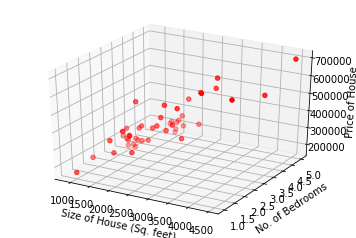

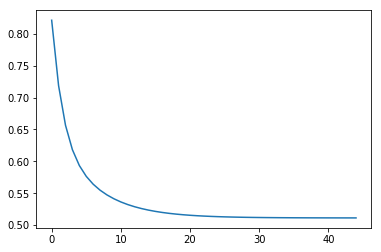

2. LR with two variables - Root mean square error is 0.5112931470865216


In [3]:
# Q.2 Linear regression with two variables from scratch
# Reading and plotting data
data2 = pd.read_csv('ex1data2.csv', header=None)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2[0], data2[1], data2[2], c='r', marker='o')
ax.set_xlabel('Size of House (Sq. feet)')
ax.set_ylabel('No. of Bedrooms')
ax.set_zlabel('Price of House')
plt.show()


def get_rmse2(x, y, weight1, weight2, bias):
    m1 = len(x)
    m2 = len(x[0])
    total_error = 0.0
    for i in range(m1):
        total_error += (y[i] - (weight1*x[i][0] + weight2*x[i][1] + bias) )**2
    return math.sqrt(total_error / m1)

def update_weights2(x, y, weight1, weight2, bias, learning_rate):
    weight_deriv1 = 0
    weight_deriv2 = 0
    bias_deriv = 0
    m1 = len(x)
    m2 = len(x[0])

    for i in range(m1):
        # Calculate partial derivatives
        # -2x1(y - (mx1 + b))
        weight_deriv1 += -2*x[i][0] * (y[i] - (weight1*x[i][0] + weight2*x[i][1] + bias))
        weight_deriv2 += -2*x[i][1] * (y[i] - (weight1*x[i][0] + weight2*x[i][1] + bias))
        # -2(y - (mx + b))
        bias_deriv += -2*(y[i] - (weight1*x[i][0] + weight2*x[i][1] + bias))

    # We subtract because the derivatives point in direction of steepest ascent
    weight1 -= (weight_deriv1 / m1) * learning_rate
    weight2 -= (weight_deriv2 / m1) * learning_rate
    bias -= (bias_deriv / m1) * learning_rate

    return weight1, weight2, bias

def fit2(x, y, weight1, weight2, bias, learning_rate, iters):
    cost_history = []
    weights1 = []
    weights2 = []
    biases = []
    old_cost = sys.maxsize
    new_cost = sys.maxsize
    while(True):
        weight1, weight2, bias = update_weights2(x, y, weight1, weight2, bias, learning_rate)
        #print (str(weight1) + " " + str(weight2))
        weights1.append(weight1)
        weights2.append(weight2)
        biases.append(bias)
        #Calculate cost for auditing purposes
        old_cost = new_cost
        new_cost = get_rmse2(x, y, weight1, weight2, bias)
        if(abs(old_cost - new_cost) < 0.00001):
            #print("breaking" + str(old_cost) + str(new_cost))
            break;
        cost_history.append(new_cost)
        # Log cost
        # print ("cost: "+str(new_cost))
    plt.plot(cost_history)
    plt.show()
    return weights1, weight2, biases, new_cost

# Normalize the data for proper scaling
normalized_df=(data2-data2.mean())/data2.std()
df1 = normalized_df[[0,1]]
df2 = normalized_df[[2]]
# Tried with several learning rates - best results obtained in 0.1
b1, b2, b0, cost2 = fit2(df1.values, df2.values, 0, 0, 0, 0.1, 10000)
print ("2. LR with two variables - Root mean square error is "+ str(cost2))

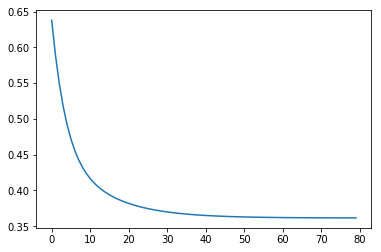

2-1. LR with two variables using matrix - Root mean square error is 0.36161057688843523


In [4]:
# Q.2-1 - Linear Regression with two/multiple variables using matrix

def get_rmse21(x, y, beta):
    m = len(x)
    inner = np.power(((x * beta.T) - y), 2)
    return math.sqrt(np.sum(inner) / (2 * m))

def gradientDescent21(x, y, beta, learning_rate, iters):  
    temp = np.matrix(np.zeros(beta.shape))
    parameters = int(beta.ravel().shape[1])
    cost = np.zeros(iters)
    old_cost = sys.maxsize
    new_cost = sys.maxsize
    cost_history = []
    for i in range(iters):
        error = (x * beta.T) - y
        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = beta[0,j] - ((learning_rate / len(x)) * np.sum(term))
            
        beta = temp
        old_cost = new_cost
        new_cost = get_rmse21(x, y, beta)
        if(abs(old_cost - new_cost) < 0.00001):
            #print("breaking" + str(old_cost) + str(new_cost))
            break;
        #print "cost : " + str(new_cost)
        cost[i] = str(new_cost)
        cost_history.append(new_cost)
    plt.plot(cost_history)
    plt.show()
    return beta, cost, new_cost

# Prepare data
normalized_df.insert(0,-1,1)  # inserting ones column for beta0
df1 = normalized_df[[-1,0,1]]
df2 = normalized_df[[2]]
normalized_df.head()

X21 =  np.matrix(df1.values)
Y21 =  np.matrix(df2.values)
beta = np.matrix(np.array([0,0,0]))

# Tried with several learning rates - best results obtained in 0.1
beta21, costs21, cost21 = gradientDescent21(X21, Y21, beta, 0.1, 10000)
# print(beta21)
print ("2-1. LR with two variables using matrix - Root mean square error is "+ str(cost21))

In [5]:
# Q.2-2 - Linear Regression with two/multiple variables using normal equation

# Fit the previous data as dataset is same
# Using normal equation
df1 = normalized_df[[-1,0,1]]
df2 = normalized_df[[2]]

def get_rmse22(X, Y, beta):
    m = len(X);
    inner = np.power((np.dot(X,beta) - Y),2)
    return math.sqrt(np.sum(inner) / (2 * m));

def normal_equation(X, Y):
    m = len(X);
    one = np.ones((m, 1))
    Xnew = np.column_stack((one,X))# Construct the augmented matrix X
    Ynew = np.reshape(Y,(-1,1))
    X_transpose = Xnew.transpose()
    ne = np.linalg.pinv(np.dot(X_transpose,Xnew))
    ne = np.dot(ne ,X_transpose)
    beta = np.dot(ne,Ynew)
    #print(beta)
    rms = get_rmse22(Xnew, Ynew, beta)
    return rms

cost22 = normal_equation(df1.values, df2.values);

print ("2-2. LR with two variables using normal equation - Root mean square error is "+ str(cost22))

2-2. LR with two variables using normal equation - Root mean square error is 0.36150585543192676


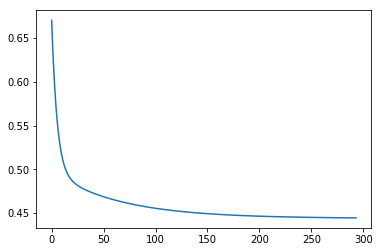

3-1. LR with multiple variables using matrix - Root mean square error is 0.4444581424994066


In [6]:
# Q. 3-1 - Linear regression with multiple variables using matrix
# Reading and plotting data
data3 = pd.read_csv('ex1data3.csv', sep=",", encoding='utf-8', header='infer')

# Prepare normalized data
data3 = data3.drop('Unnamed: 0',axis=1)
normalized_df3=(data3-data3.mean())/data3.std()

df1 = normalized_df3[normalized_df3.columns[:8]]
df1.insert(0,'beta',1)  # inserting ones column for beta0
df2 = normalized_df3[normalized_df3.columns[8:]]

X31 =  np.matrix(df1.values)
Y31 =  np.matrix(df2.values)
beta = np.matrix(np.zeros(X31.shape[1]))


# Tried with several learning rates - best results obtained in 0.1
# Reusing the same code for two variables/ multiple variables
beta31, costs31, cost31 = gradientDescent21(X31, Y31, beta, 0.1, 10000)
# print(beta31)
print ("3-1. LR with multiple variables using matrix - Root mean square error is "+ str(cost31))

In [7]:
# Q. 3-2 Linear regression with multiple variables using Normal equation

df1 = data3[data3.columns[:8]]
df1.insert(0,'beta',1)  # inserting ones column for beta0
# print(df1.head())
df2 = data3[data3.columns[8:]]
# print(df2.head())

X33 = df1
Y33 = df2
m = len(X33)

rms32 = normal_equation(X33, Y33)
print ("3-2. LR with multiple variables using normal equation - Root mean square error is "+ str(rms32))


3-2. LR with multiple variables using normal equation - Root mean square error is 0.5120161062821315


In [8]:
# Q.3-3. Linear regression with multiple variables using scikit-learn linear regression model

Lin_reg= LinearRegression()
Lin_reg.fit(X31, Y31)
pred_Y31 = Lin_reg.predict(X31)
# print pred_Y31

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# print (pred_Y31.shape)
# print (Y31.shape)
rms = rmse(np.array(pred_Y31), np.array(Y31))
print ("3-3. LR with multiple variables using scikit-learn linear regression model - Root mean square error is "+ str(rms))

3-3. LR with multiple variables using scikit-learn linear regression model - Root mean square error is 0.627493615048


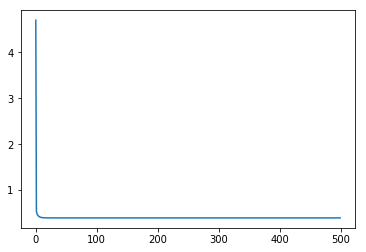

3-4. LR with multiple variables using gradient descent in tensor flow - Root mean square error is 0.6274936150483338


In [9]:
# Q. 3-4 Linear regression with multiple variables using TensorFlow

# normalize data
df1 = normalized_df3[normalized_df3.columns[:8]]
df1.insert(0,'beta',1) # inserting ones column for beta0
df2 = normalized_df3[normalized_df3.columns[8:]]

X34 = df1;
Y34 = df2;

# X34, Y34 = shuffle(X34, Y34);
W = tf.Variable(tf.random_normal([X34.shape[1],1], mean=0.0, stddev=1.0, dtype=tf.float64))
x = tf.placeholder(tf.float64)
y = tf.placeholder(tf.float64)
                
pred = tf.matmul(x, W)
cost = tf.reduce_mean(tf.pow(pred-y, 2))
                
sess = tf.Session()
init = tf.global_variables_initializer()

# 0.1 best learning rate
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
cost_history = []
              
def gradient_descent_tensorflow(training_epochs, X, Y):
    sess.run(init)
    new_cost = 0
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={x:X, y:Y})
        
        if(epoch % 10 == 0):
            new_cost = sess.run(cost, feed_dict={x:X, y:Y})
            cost_history.append(new_cost)
                
        #if(epoch % 500 == 0):
            #print(sess.run(cost, feed_dict={x:X, y:Y}))
    sess.close()
                
    plt.plot(cost_history)
    plt.show()
    return math.sqrt(new_cost)
                
rmse = gradient_descent_tensorflow(5000, X34, Y34)
print ("3-4. LR with multiple variables using gradient descent in tensor flow - Root mean square error is "+ str(rmse))